Import necessary libraries

In [1]:
!pip install pingouin==0.5.0
!pip install scikit_posthocs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols

     |████████████████████████████████| 43 kB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=ab9867e75e4f39839f7771ccb8595a4289238a79e86addc0e71a297ef682aac0
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


/usr/local/lib/python3.7/dist-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


##Cleaning dataset

1.1: Visualize dataset


In [3]:
data = pd.read_csv('diabetes (2).csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

1.2: Replace 0 with missing
For "missing" values of 0 in Glucose, BloodPressure, SkinThickness, Insulin, and BMI replace with NaN 


In [ ]:
data["Glucose"] = data["Glucose"].apply(lambda x: np.NaN if x == 0 else x)
data["BloodPressure"] = data["BloodPressure"].apply(lambda x: np.NaN if x == 0 else x)
data["SkinThickness"] = data["SkinThickness"].apply(lambda x: np.NaN if x == 0 else x)
data["Insulin"] = data["Insulin"].apply(lambda x: np.NaN if x == 0 else x)
data["BMI"] = data["BMI"].apply(lambda x: np.NaN if x == 0 else x)

data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

##Exploratory Data Analysis

2.1: First view overall summary statistics of columns


In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

2.2: View data for groups who have diabetes and who do not have diabetes





In [ ]:
datatrue = data[data.Outcome==1]
datatrue.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  266.000000     252.000000     180.000000  130.000000   
mean      4.865672  142.319549      75.321429      33.000000  206.846154   
std       3.741239   29.599199      12.299866      10.327595  132.699898   
min       0.000000   78.000000      30.000000       7.000000   14.000000   
25%       1.750000  119.000000      68.000000      27.000000  127.500000   
50%       4.000000  140.000000      74.500000      32.000000  169.500000   
75%       8.000000  167.000000      84.000000      39.000000  239.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  266.000000                268.000000  268.000000    268.0  
mean    35.406767                  0.550500   37.067164      1.0  
std      6.614982                  0.372354   10.968254      0.0  
min     22.900000                  0.088000   21.000000      1.0  
25%     30.900000                  0.262500   28.000000      1.0  
50%     34.300000                  0.449000   36.000000      1.0  
75%     38.925000                  0.728000   44.000000      1.0  
max     67.100000                  2.420000   70.000000      1.0

In [ ]:
datafalse=data[data.Outcome==0]
datafalse.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  497.000000     481.000000     361.000000  264.000000   
mean      3.298000  110.643863      70.877339      27.235457  130.287879   
std       3.017185   24.776906      12.161223      10.026491  102.482237   
min       0.000000   44.000000      24.000000       7.000000   15.000000   
25%       1.000000   93.000000      62.000000      19.000000   66.000000   
50%       2.000000  107.000000      70.000000      27.000000  102.500000   
75%       5.000000  125.000000      78.000000      33.000000  161.250000   
max      13.000000  197.000000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  491.000000                500.000000  500.000000    500.0  
mean    30.859674                  0.429734   31.190000      0.0  
std      6.560737                  0.299085   11.667655      0.0  
min     18.200000                  0.078000   21.000000      0.0  
25%     25.600000                  0.229750   23.000000      0.0  
50%     30.100000                  0.336000   27.000000      0.0  
75%     35.300000                  0.561750   37.000000      0.0  
max     57.300000                  2.329000   81.000000      0.0

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

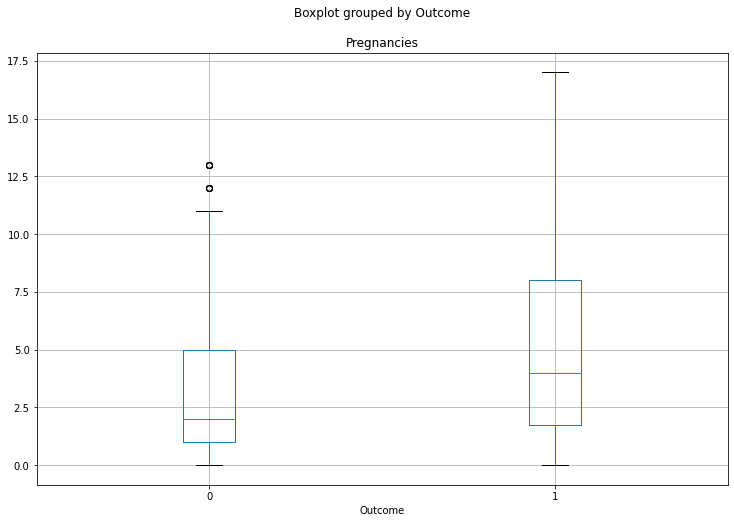

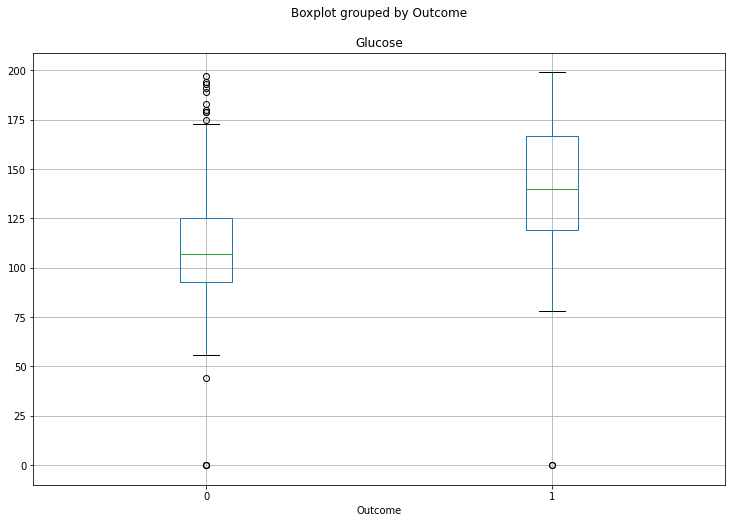

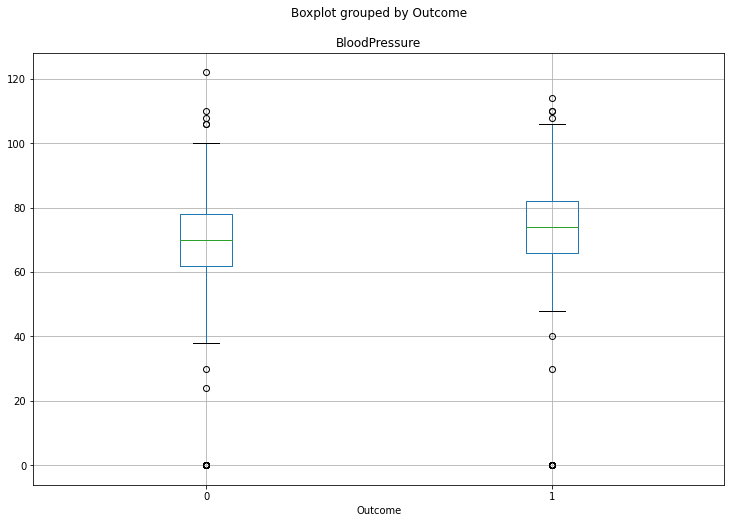

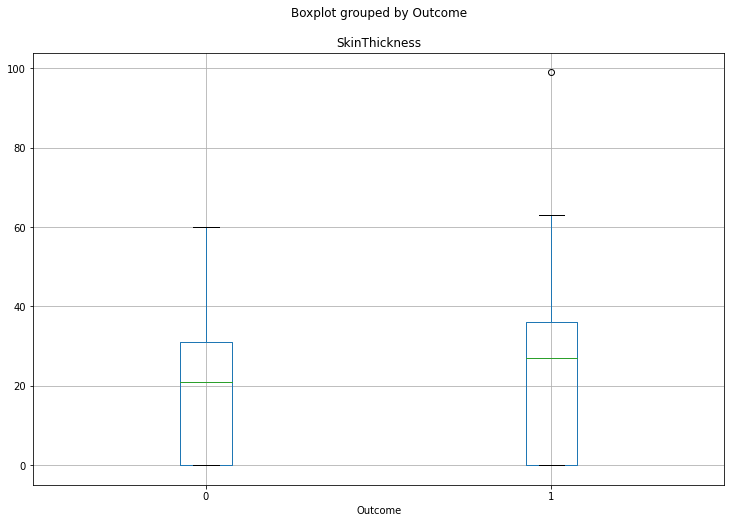

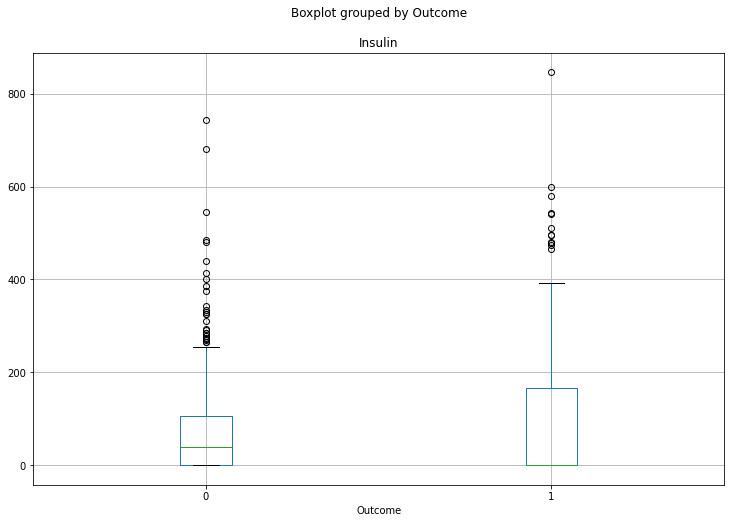

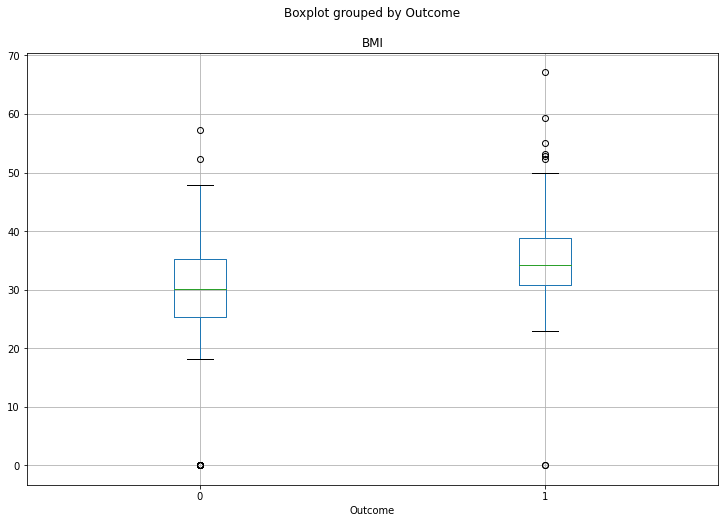

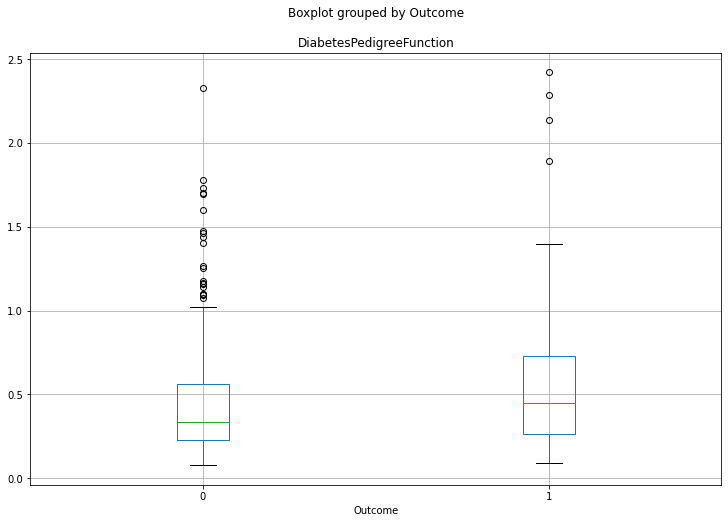

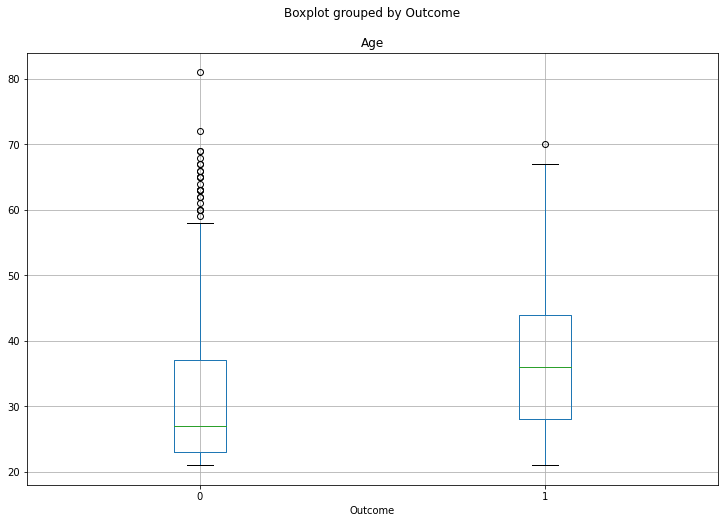

In [6]:
data.boxplot('Pregnancies', by='Outcome', figsize=(12, 8))
data.boxplot('Glucose', by='Outcome', figsize=(12, 8))
data.boxplot('BloodPressure', by='Outcome', figsize=(12, 8))
data.boxplot('SkinThickness', by='Outcome', figsize=(12, 8))
data.boxplot('Insulin', by='Outcome', figsize=(12, 8))
data.boxplot('BMI', by='Outcome', figsize=(12, 8))
data.boxplot('DiabetesPedigreeFunction', by='Outcome', figsize=(12, 8))
data.boxplot('Age', by='Outcome', figsize=(12, 8))


# 2.3: Two-mean t-tests

P-Value:nan T-Statistic:nan


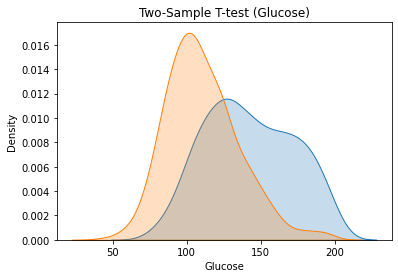

In [ ]:
sns.kdeplot(datatrue["Glucose"], shade=True)
sns.kdeplot(datafalse["Glucose"], shade=True)
plt.title("Two-Sample T-test (Glucose)")

Text(0.5, 1.0, 'Two-Sample T-test (Age)')

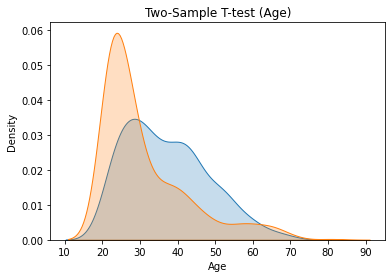

In [ ]:
sns.kdeplot(datatrue["Age"], shade=True)
sns.kdeplot(datafalse["Age"], shade=True)
plt.title("Two-Sample T-test (Age)")

Text(0.5, 1.0, 'Two-Sample T-test (Insulin)')

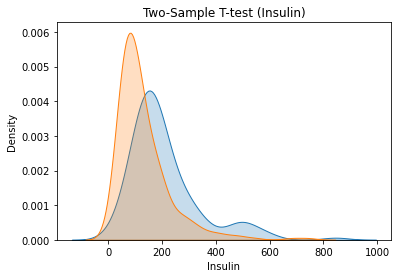

In [ ]:
sns.kdeplot(datatrue["Insulin"], shade=True)
sns.kdeplot(datafalse["Insulin"], shade=True)
plt.title("Two-Sample T-test (Insulin)")

In [ ]:
tStat, pValue = stats.ttest_ind(datatrue["Pregnancies"], datafalse["Pregnancies"], equal_var=False, nan_policy="omit")
print("Pregnancies P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["Glucose"], datafalse["Glucose"], equal_var=False, nan_policy="omit")
print("Glucose P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["BloodPressure"], datafalse["BloodPressure"], equal_var=False, nan_policy="omit")
print("BloodPressure P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["SkinThickness"], datafalse["SkinThickness"], equal_var=False, nan_policy="omit")
print("SkinThickness P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["Insulin"], datafalse["Insulin"], equal_var=False, nan_policy="omit")
print("Insulin P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["BMI"], datafalse["BMI"], equal_var=False, nan_policy="omit")
print("BMI P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["DiabetesPedigreeFunction"], datafalse["DiabetesPedigreeFunction"], equal_var=False, nan_policy="omit")
print("DiabetesPedigreeFunction P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(datatrue["Age"], datafalse["Age"], equal_var=False, nan_policy="omit")
print("Age P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

Pregnancies P-Value:6.821925600457145e-09 T-Statistic:5.9069614794974905
Glucose P-Value:2.8439261927745145e-41 T-Statistic:14.884412050496012
BloodPressure P-Value:3.971544637191867e-06 T-Statistic:4.664265117573659
SkinThickness P-Value:1.8255271175008677e-09 T-Statistic:6.176586768994067
Insulin P-Value:2.6721163998761486e-08 T-Statistic:5.783322398279952
BMI P-Value:2.4835713809712167e-18 T-Statistic:9.055003741836805
DiabetesPedigreeFunction P-Value:6.1004814242403285e-06 T-Statistic:4.576812008291278
Age P-Value:1.2015125273113395e-11 T-Statistic:6.92073837898804


In [ ]:
corrMatrix = datatrue.corr()
print(corrMatrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000 -0.053010       0.140992      -0.102248   
Glucose                     -0.053010  1.000000       0.101319       0.096587   
BloodPressure                0.140992  0.101319       1.000000       0.092068   
SkinThickness               -0.102248  0.096587       0.092068       1.000000   
Insulin                     -0.003336  0.398039      -0.073271       0.051847   
BMI                         -0.131480  0.056638       0.249108       0.515212   
DiabetesPedigreeFunction    -0.069195  0.027343      -0.060649       0.130701   
Age                          0.444987  0.113157       0.286481      -0.065115   
Outcome                           NaN       NaN            NaN            NaN   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.003336 -0.131480                 -0.069195   
Glucose                   0.398039  0.056

2.5: Investigate relationship between age/outcome

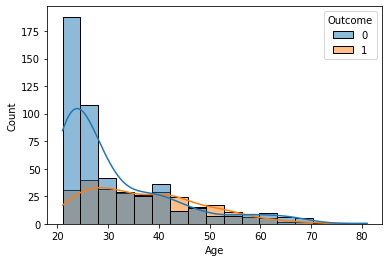

In [ ]:
sns.histplot(x="Age", hue="Outcome", data=data, kde=True)


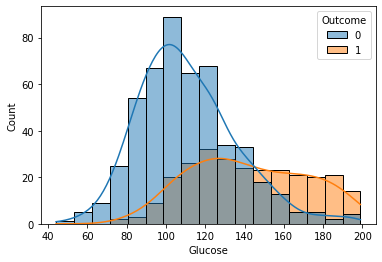

In [ ]:
sns.histplot(x="Glucose", hue="Outcome", data=data, kde=True)

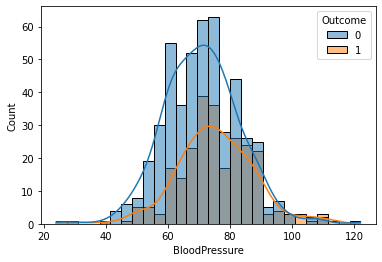

In [ ]:
sns.histplot(x="BloodPressure", hue="Outcome", data=data, kde=True)

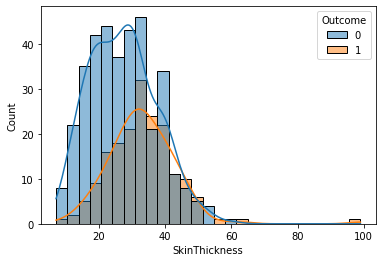

In [ ]:
sns.histplot(x="SkinThickness", hue="Outcome", data=data, kde=True)

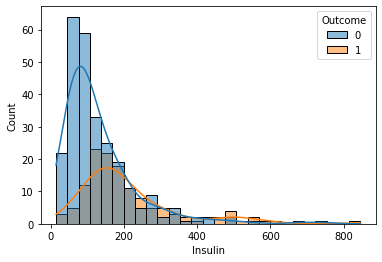

In [ ]:
sns.histplot(x="Insulin", hue="Outcome", data=data, kde=True)

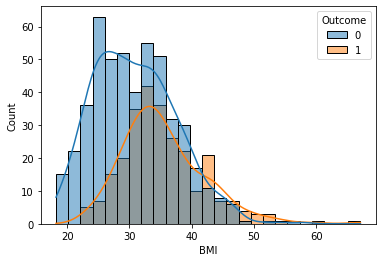

In [ ]:
sns.histplot(x="BMI", hue="Outcome", data=data, kde=True)

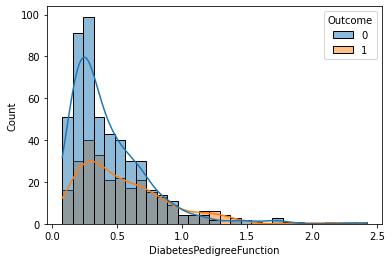

In [ ]:
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=data, kde=True)

# 3.1: Multiple Linear Regression
Run ANOVAs with each variable + post-hoc tests

In [37]:
aovAge=pg.anova(data=data, dv="Age", between="Outcome",detailed=True)
print(aovAge)

    Source             SS   DF           MS          F         p-unc       np2
0  Outcome    6026.695153    1  6026.695153  46.140611  2.209975e-11  0.056814
1   Within  100051.741045  766   130.615850        NaN           NaN       NaN


In [38]:
ptAge=pg.pairwise_tukey(dv="Age",between="Outcome",effsize="Cohen",data=data)
print(ptAge)

   A  B  mean(A)    mean(B)      diff        se         T  p-tukey     Cohen
0  0  1    31.19  37.067164 -5.877164  0.865219 -6.792688    0.001 -0.514245


ANOVA for Insulin

In [39]:
aovInsulin=pg.anova(data=data, dv="Insulin", between="Outcome",detailed=True)
print(aovInsulin)

    Source            SS   DF             MS          F     p-unc       np2
0  Outcome  1.736090e+05    1  173608.975672  13.281108  0.000286  0.017043
1   Within  1.001306e+07  766   13071.874862        NaN       NaN       NaN


In [40]:
ptInsulin=pg.pairwise_tukey(dv="Insulin",between="Outcome",effsize="Cohen",data=data)
print(ptInsulin)

   A  B  mean(A)     mean(B)       diff        se         T  p-tukey     Cohen
0  0  1   68.792  100.335821 -31.543821  8.655599 -3.644325    0.001 -0.275896


ANOVA for BMI

In [41]:
aovBMI=pg.anova(data=data, dv="BMI", between="Outcome",detailed=True)
print(aovBMI)

    Source            SS   DF           MS          F         p-unc      np2
0  Outcome   4084.471441    1  4084.471441  71.772072  1.229807e-16  0.08567
1   Within  43592.236255  766    56.908925        NaN           NaN      NaN


In [42]:
ptBMI=pg.pairwise_tukey(dv="BMI",between="Outcome",effsize="Cohen",data=data)
print(ptBMI)

   A  B  mean(A)    mean(B)      diff        se        T  p-tukey     Cohen
0  0  1  30.3042  35.142537 -4.838337  0.571108 -8.47184    0.001 -0.641366


ANOVA for pregnancies

In [43]:
aovPregnancies=pg.anova(data=data, dv="Pregnancies", between="Outcome",detailed=True)
print(aovPregnancies)

    Source           SS   DF          MS          F         p-unc       np2
0  Outcome   428.799019    1  428.799019  39.670227  5.065127e-10  0.049239
1   Within  8279.762179  766   10.809089        NaN           NaN       NaN


In [44]:
ptPregnancies=pg.pairwise_tukey(dv="Pregnancies",between="Outcome",effsize="Cohen",data=data)
print(ptPregnancies)

   A  B  mean(A)   mean(B)      diff        se         T  p-tukey     Cohen
0  0  1    3.298  4.865672 -1.567672  0.248899 -6.298431    0.001 -0.476827


ANOVA for Glucose

In [45]:
aovGlucose=pg.anova(data=data, dv="Glucose", between="Outcome",detailed=True)
print(aovBMI)

    Source            SS   DF           MS          F         p-unc      np2
0  Outcome   4084.471441    1  4084.471441  71.772072  1.229807e-16  0.08567
1   Within  43592.236255  766    56.908925        NaN           NaN      NaN


In [47]:
ptGlucose=pg.pairwise_tukey(dv="Glucose",between="Outcome",effsize="Cohen",data=data)
print(ptGlucose)

   A  B  mean(A)     mean(B)       diff        se         T  p-tukey     Cohen
0  0  1   109.98  141.257463 -31.277463  2.142283 -14.60006    0.001 -1.105307


ANOVA for BLoodPressure

In [48]:
aovBloodPressure=pg.anova(data=data, dv="BloodPressure", between="Outcome",detailed=True)
print(aovBloodPressure)

    Source             SS   DF           MS        F     p-unc       np2
0  Outcome    1216.627569    1  1216.627569  3.25695  0.071514  0.004234
1   Within  286137.829463  766   373.548080      NaN       NaN       NaN


In [50]:
ptBloodPressure=pg.pairwise_tukey(dv="BloodPressure",between="Outcome",effsize="Cohen",data=data)
print(ptBloodPressure)

   A  B  mean(A)    mean(B)      diff        se         T   p-tukey     Cohen
0  0  1   68.184  70.824627 -2.640627  1.463192 -1.804702  0.071514 -0.136626


ANOVA for SkinThickness

In [51]:
aovSkinThickness=pg.anova(data=data, dv="SkinThickness", between="Outcome",detailed=True)
print(aovSkinThickness)

    Source             SS   DF           MS         F     p-unc       np2
0  Outcome    1090.651047    1  1090.651047  4.304381  0.038348  0.005588
1   Within  194090.328119  766   253.381629       NaN       NaN       NaN


In [52]:
ptSkinThickness=pg.pairwise_tukey(dv="SkinThickness",between="Outcome",effsize="Cohen",data=data)
print(ptSkinThickness)

   A  B  mean(A)    mean(B)      diff       se       T   p-tukey     Cohen
0  0  1   19.664  22.164179 -2.500179  1.20508 -2.0747  0.038349 -0.157066


ANOVA for DiabetesPedigreeFunction

In [53]:
aovDiabetesPedigreeFunction=pg.anova(data=data, dv="DiabetesPedigreeFunction", between="Outcome",detailed=True)
print(aovBMI)

    Source            SS   DF           MS          F         p-unc      np2
0  Outcome   4084.471441    1  4084.471441  71.772072  1.229807e-16  0.08567
1   Within  43592.236255  766    56.908925        NaN           NaN      NaN


In [54]:
ptDiabetesPedigreeFunction=pg.pairwise_tukey(dv="DiabetesPedigreeFunction",between="Outcome",effsize="Cohen",data=data)
print(ptDiabetesPedigreeFunction)

   A  B   mean(A)  mean(B)      diff        se         T  p-tukey     Cohen
0  0  1  0.429734   0.5505 -0.120766  0.024718 -4.885826    0.001 -0.369885


#3.2: Run Two-way ANOVAs

In [ ]:
model=ols('Outcome~C(Age)+C(Glucose) + C(Age):C(Glucose)',data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 51, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1873: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 135, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


In [ ]:
model = ols('Outcome ~ C(Age) + C(BMI) + C(Age):C(BMI)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
model=ols('Outcome~C(BMI)+C(Age) + C(BMI):C(Age)',data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table